<a href="https://colab.research.google.com/github/ShuaimingJing/XAI_assignment2/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #3 Interpretable ML
Name: Shuaiming Jing

Referenced material: https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/rulefit_interpretability.ipynb
https://github.com/csinva/imodels?tab=readme-ov-file

In [4]:
! pip install imodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.0/243.0 kB 2.8 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imodels import get_clean_dataset, HSTreeClassifierCV # import any imodels model here
from sklearn.tree import plot_tree
from imodels import FIGSClassifier
from imodels import RuleFitRegressor
from sklearn.metrics import mean_squared_error


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Decision Tree with Hierarchical Shrinkage

Hierarchical shrinkage is an extremely fast post-hoc regularization method which works on any decision tree (or tree-based ensemble, such as Random Forest). It does not modify the tree structure, and instead regularizes the tree by shrinking the prediction over each node towards the sample means of its ancestors (using a single regularization parameter).



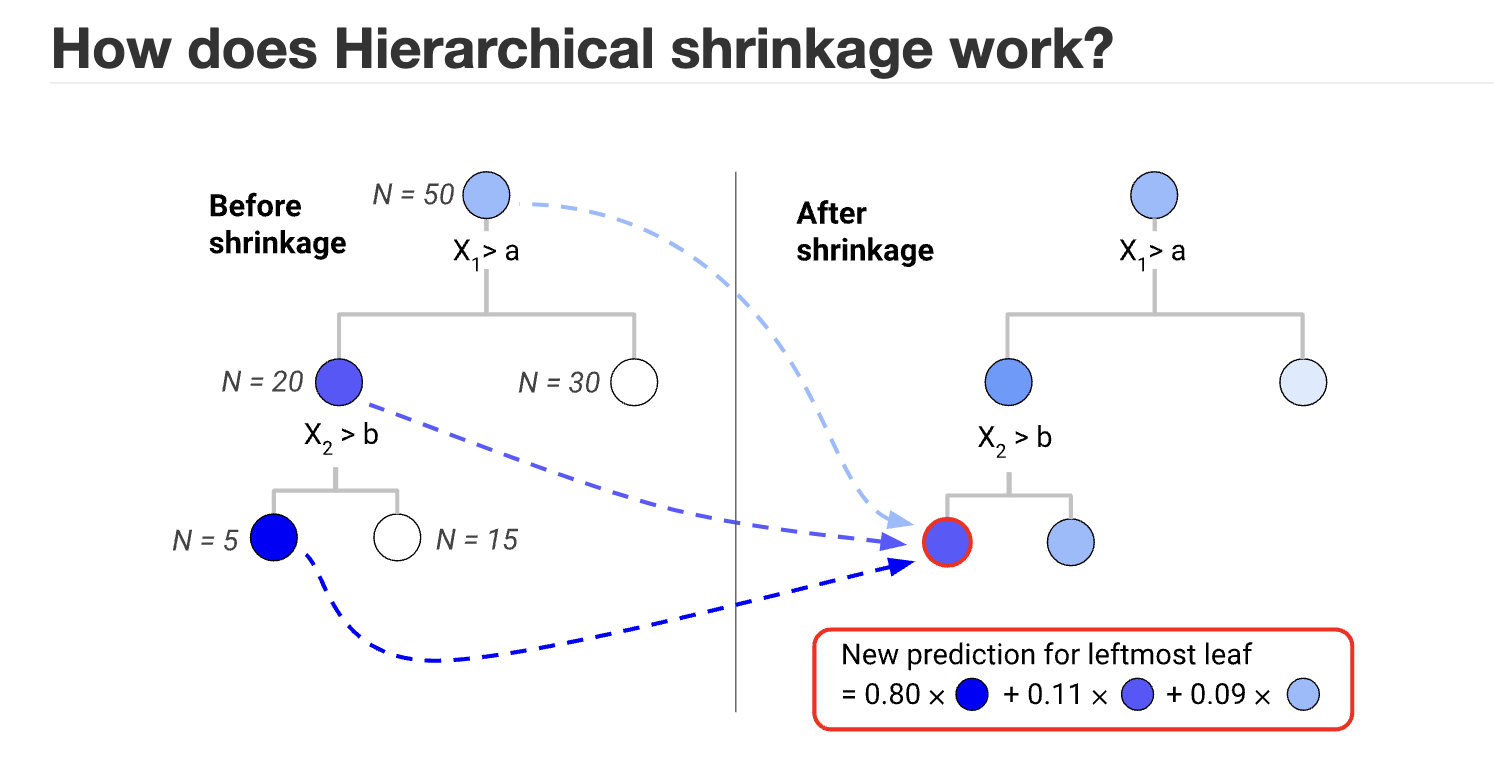

## Left Side(Before Shrinkage):
**Tree Structure:**

The tree begins with a split on feature X1 with threshold a. This is the root node, with 50 samples.
The left child node further splits on X2 with threshold b. This left subtree has 20 samples, and the two child nodes from this split have 5 and 15 samples respectively.
The right child node from the X1 > a split has 30 samples and is shown as a terminal node.

**Node Details:**

The nodes are colored based on their class predictions, with darker colors representing nodes that are more confident in their predictions.
The prediction for the leftmost node (with 5 samples) is highly influenced by the data it contains, and there is no adjustment for the hierarchical structure of the tree at this stage. Each node is independent.


## Right Side: After Shrinkage
**Hierarchical Shrinkage Applied:**

After shrinkage, the predictions for each node are "shrunk" or adjusted based on the structure of the tree.
The idea is that predictions made in smaller nodes (with fewer samples) are not entirely independent but are influenced by their parent nodes. This is done to prevent overfitting and to reflect the idea that nodes with fewer samples may have less reliable predictions.

**New Prediction Calculation:**

The new prediction for the leftmost node (the one with 5 samples) is a weighted combination of the predictions from:
The Node Itself (dark blue, with weight 0.80): This represents the prediction made by the node based on the data within it.
Its Parent Node (light blue, with weight 0.11): This is the prediction of the parent node, which contains more samples and thus has a more reliable estimate.
The Root Node (lightest blue, with weight 0.09): This is the most general prediction for the entire dataset.
The formula at the bottom indicates how these predictions are combined to form a new, "shrunk" prediction for the leftmost node.

## Code Implementation

In [12]:
# prepare data (a sample clinical dataset)
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit the model
model = HSTreeClassifierCV(max_leaf_nodes=4)  # initialize a tree model and specify only 4 leaf nodes
model.fit(X_train, y_train, feature_names=feature_names)   # fit model
preds = model.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)
print(model) # print the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pr

> ------------------------------
> Decision Tree with Hierarchical Shrinkage
> 	Prediction is made by looking at the value in the appropriate leaf of the tree
> ------------------------------
|--- FocalNeuroFindings2 <= 0.50
|   |--- HighriskDiving <= 0.50
|   |   |--- Torticollis2 <= 0.50
|   |   |   |--- weights: [0.90, 0.10] class: 0.0
|   |   |--- Torticollis2 >  0.50
|   |   |   |--- weights: [0.70, 0.30] class: 0.0
|   |--- HighriskDiving >  0.50
|   |   |--- weights: [0.30, 0.70] class: 1.0
|--- FocalNeuroFindings2 >  0.50
|   |--- weights: [0.57, 0.43] class: 0.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


In [13]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.6666666666666666, 0.875, 'FocalNeuroFindings2 <= 0.5\ngini = 0.274\nsamples = 2484\nvalue = [0.836, 0.164]'),
 Text(0.5, 0.625, 'HighriskDiving <= 0.5\ngini = 0.207\nsamples = 2109\nvalue = [0.883, 0.117]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Torticollis2 <= 0.5\ngini = 0.198\nsamples = 2089\nvalue = [0.888, 0.112]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.179\nsamples = 1964\nvalue = [0.901, 0.099]'),
 Text(0.5, 0.125, 'gini = 0.423\nsamples = 125\nvalue = [0.696, 0.304]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.42\nsamples = 20\nvalue = [0.3, 0.7]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.489\nsamples = 375\nvalue = [0.573, 0.427]'),
 Text(0.75, 0.75, '  False')]

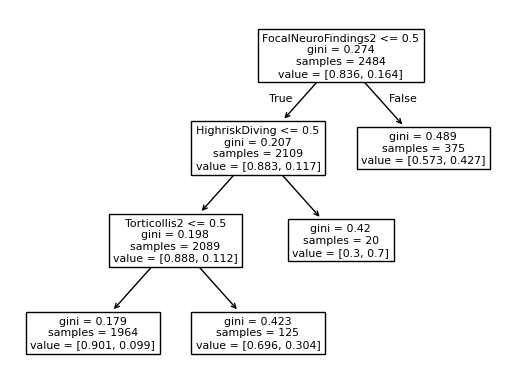

In [12]:
plot_tree(model.estimator_, feature_names=feature_names)


# Fast Interpretable greedy-tree sums (FIGS)
FIGS generalizes the CART algorithm to work on sums of trees, growing a flexible number of them simultaneously. The total number of splits across all the trees is restricted by a pre-specified threshold, which ensures that FIGS remains interpretable.

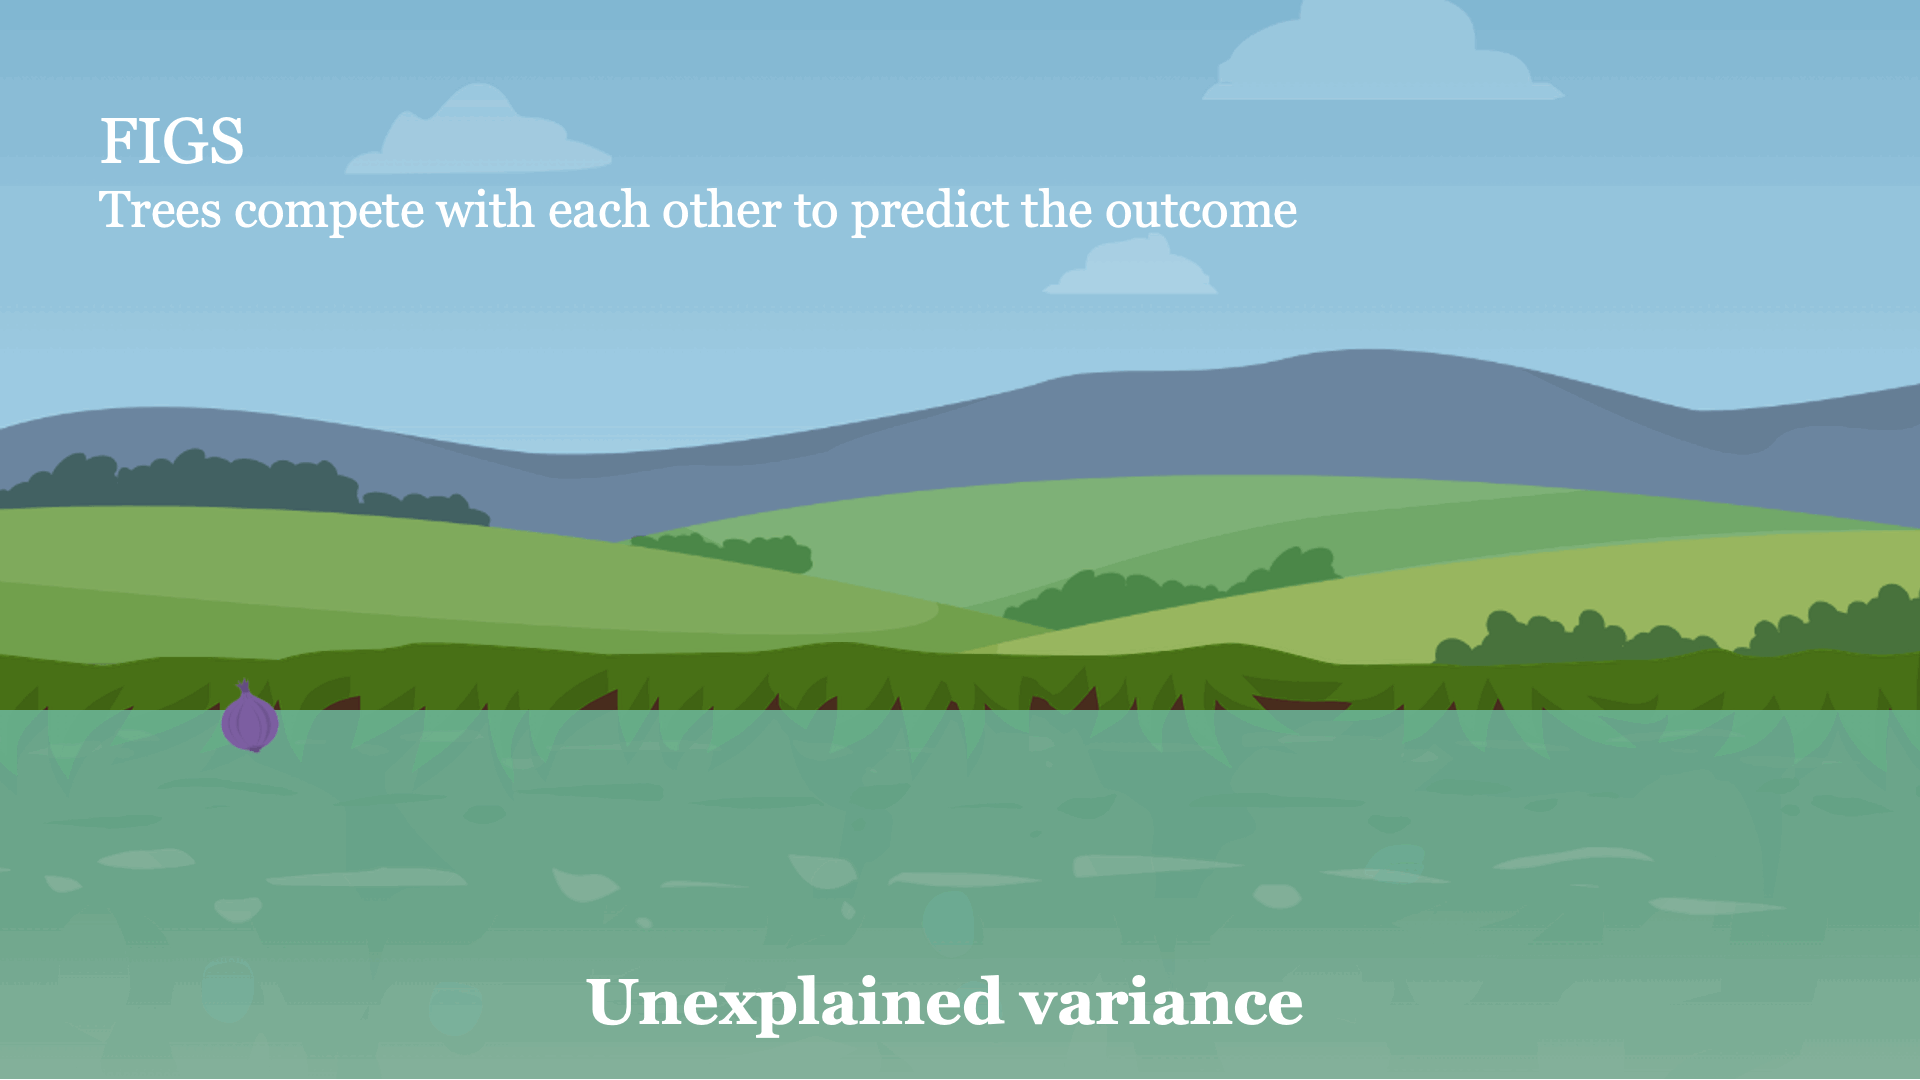

Intuitively, FIGS works by extending CART, a typical greedy algorithm for growing a decision tree, to consider growing a sum of trees simultaneously (see gif above). At each iteration, FIGS may grow any existing tree it has already started or start a new tree; it greedily selects whichever rule reduces the total unexplained variance (or an alternative splitting criterion) the most. To keep the trees in sync with one another, each tree is made to predict the residuals remaining after summing the predictions of all other trees.

FIGS is intuitively similar to ensemble approaches such as gradient boosting / random forest, but importantly since all trees are grown to compete with each other the model can adapt more to the underlying structure in the data. The number of trees and size/shape of each tree emerge automatically from the data rather than being manually specified.

## Code Implementation

In [14]:
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# fit the model
model = FIGSClassifier(max_rules=4)  # initialize a model
model.fit(X_train, y_train)   # fit model
preds = model.predict(X_test) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test) # predicted probabilities: shape is (n_test, n_classes)

print(model)



> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
X14 <= 0.500 (Tree #0 root)
	Val: 0.117 (leaf)
	Val: 0.427 (leaf)

	+
X4 <= 0.500 (Tree #1 root)
	Val: -0.008 (leaf)
	Val: 0.550 (leaf)

	+
X15 <= 0.500 (Tree #2 root)
	X13 <= 0.500 (split)
		Val: -0.083 (leaf)
		Val: 0.048 (leaf)
	Val: 0.058 (leaf)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.15


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


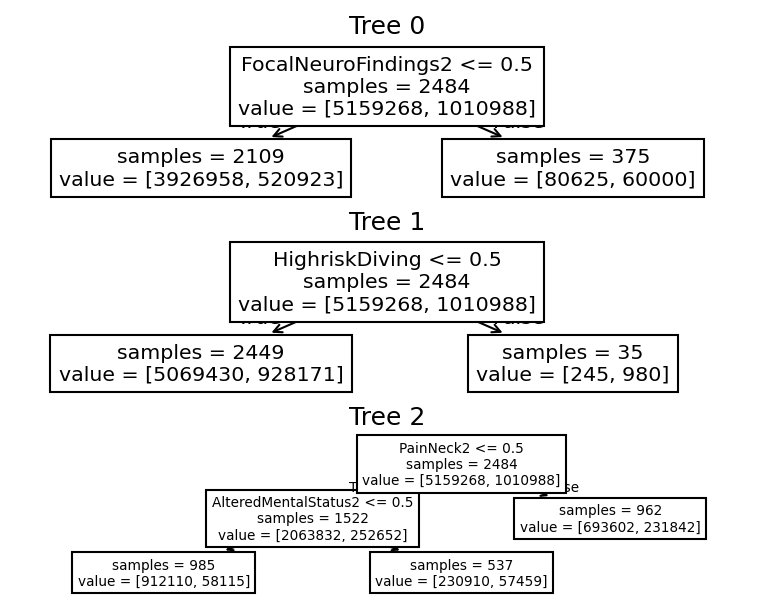

In [15]:
# visualize the model
model.plot(feature_names=feature_names, filename='out.svg')

# RuleFit
RuleFit is a machine learning algorithm that combines decision trees and linear models. It is as simple and interpretable as linear models, and also integrates feature interactions. The main idea is to extract rules from an ensemble of decision trees (like the one shown in the image) and use these rules as features in a linear model.

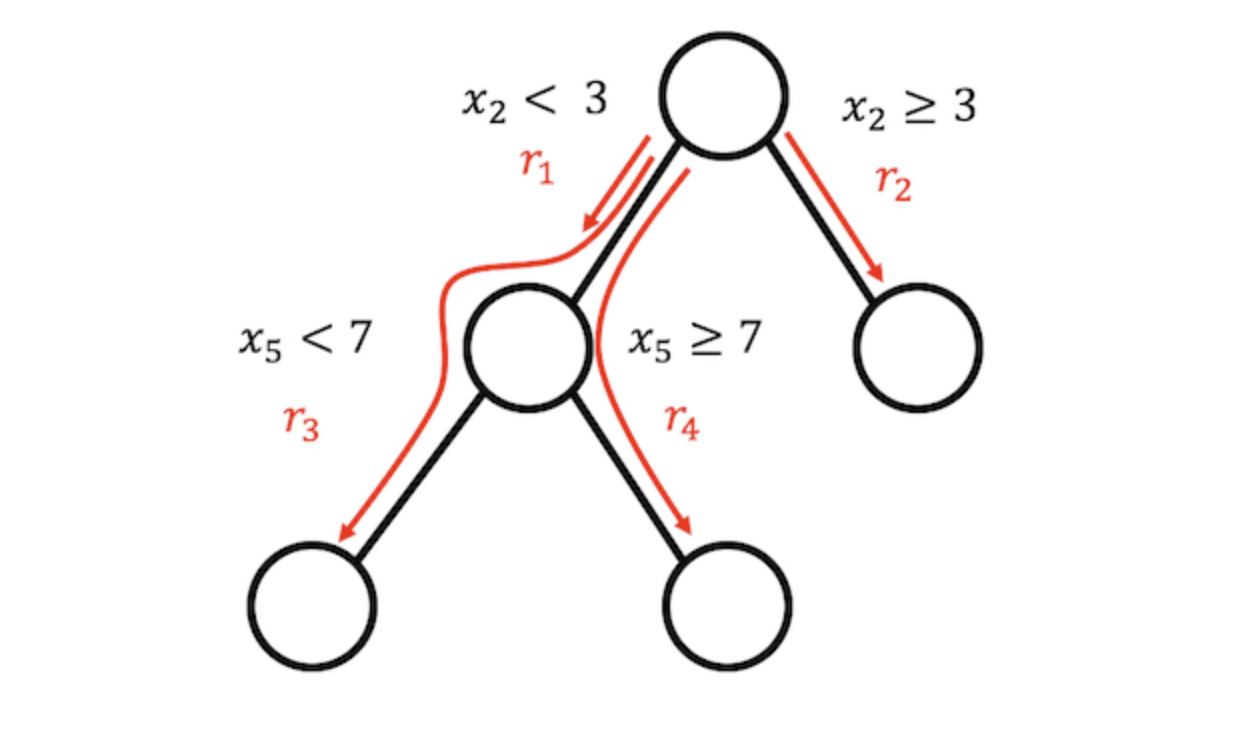

**How does RuleFit work**

Decision trees are built from the dataset, as shown in the image. Each path from the root to a leaf node in the tree corresponds to a rule.These rules represent certain conditions that data points satisfy (e.g., x2 < 3 and x5 < 7).

Once the rules are generated, each rule becomes a binary feature that indicates whether a given data point satisfies the rule or not.
For example, if a data point satisfies the condition x2 < 3, then r1 = 1; otherwise, r1 = 0.

A linear model is then trained using these rules (binary features) and potentially the original features of the dataset.
The model learns how to combine these rules to make predictions. The weight of each rule indicates how important it is in the prediction.


RuleFit also comes with a feature importance measure that helps to identify linear terms and rules that are important for the predictions. Feature importance is calculated from the weights of the regression model. The importance measure can be aggregated for the original features (which are used in their “raw” form and possibly in many decision rules).

## Code Implementation

In [17]:
# prepare data (a sample clinical dataset)
X, y, feature_names = get_clean_dataset('csi_pecarn_pred')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initialize the RuleFitRegressor
model = RuleFitRegressor()

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RuleFitRegressor()

In [11]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.11


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Extract rules
rule_df = model.visualize()
rule_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rule,coef
2,X2,-0.02
10,X10,0.01
23,X23,-0.03
25,X25,-0.00
27,X27,-0.01
29,X29,-0.04
31,X31,-0.00
32,X32,-0.02
51,X18 <= 0.5 and X4 <= 0.5,-0.06
50,X11 <= 0.5 and X22 <= 0.5,-0.01
